# Dynamic Energy Budget

The previous calculations only concern the final stable state where energy influx equals the outgoing radiation energy once equilibrium temperature is reached. But this does not take into account that global warming happens over time.

In [22]:
# imports
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In order to introdce the time factor, we compute net energy flux over some timestep and adjust the earth' heat budget accordingly.

In [23]:
# physical constants
SOLAR_CONSTANT = 1350 #[W/m^2]
EPSILON = 1
SIGMA = 5.67 * 10**-8 #[W/m^2/K^4]

First, however, we need to make some assumptions about geography. For simplicity, we assume a planet that is fully covered with water of a certain depth:

In [24]:
ocean_depth = 4000 #[m]

1 calorie is the amount of energy needed to heat 1 gram of water by 1 degree, and 4.18 Joule are about the equivalent of 1 calorie. This allows us to determine the energy stored in our model ocean:

In [25]:
def heat_capacity(ocean_depth):
    """return the amount of energy required to heat up a 1m^2 * depth cube of water"""
    return ocean_depth * 4.18 * 1E6

From here, we can find the total heat content of the earth. For instance, at a temperature of $0°C$, or $272.15 K$, this would be:

In [26]:
# example heat content
272.15 * heat_capacity(ocean_depth) #[J/m^2]

4550348000000.0

Conversely, from the heat content, we can find the surface temperature:

In [27]:
def temperature(heat_content, ocean_depth):
    """Return the earth surface temperature"""
    return heat_content / heat_capacity(ocean_depth)

The model will now compute the energy influx from the sun over one timestep, adjust the heat content, and then determine the new temperature. With a new temperature, we can compute a new output radiation in the next timestep.

In [28]:
def energy_in(albedo, dist=1):
    """Return influx from the sun"""
    return SOLAR_CONSTANT / dist**2 * (1 - albedo) / 4

In [29]:
def energy_out(temperature):
    """Return outflux from earth's radiation"""
    return EPSILON * SIGMA * temperature**4

With this in place, we can determine the total change in the earth's energy budget:

In [30]:
def net_heat_flux(duration, heat_content, ocean_depth, albedo, dist):
    """Return total heat absorbed or emitted"""
    return (energy_in(albedo, dist) - energy_out(temperature(heat_content, ocean_depth))) * duration

This formula requires a duration to be set: with a longer duration, more energy can flow. This also implies that **the model will be more accurate when smaller timesteps are chosen.**

Let's run a simulation over some 1-year long timesteps, starting from an initial temperature of $0K$. We also reuse some assumptions from the previous model:

In [31]:
# model assumptions
albedo = 0.3
dist = 1 #[AU]
temperature_init = 0

# simulation parameters
timestep = 60 * 60 * 24 * 365 # 1year
epochs = 1500

In [32]:
# collect temperature development over time
temperatures = []

# initial heat content
heat_content = heat_capacity(ocean_depth) * temperature_init

for _ in range(epochs):
    heat_content += net_heat_flux(timestep, heat_content, ocean_depth, albedo, dist)
    temperatures.append(temperature(heat_content, ocean_depth))

We can now see how temperatures would develop over 1500 years. Let's convert to Celsius before plotting.

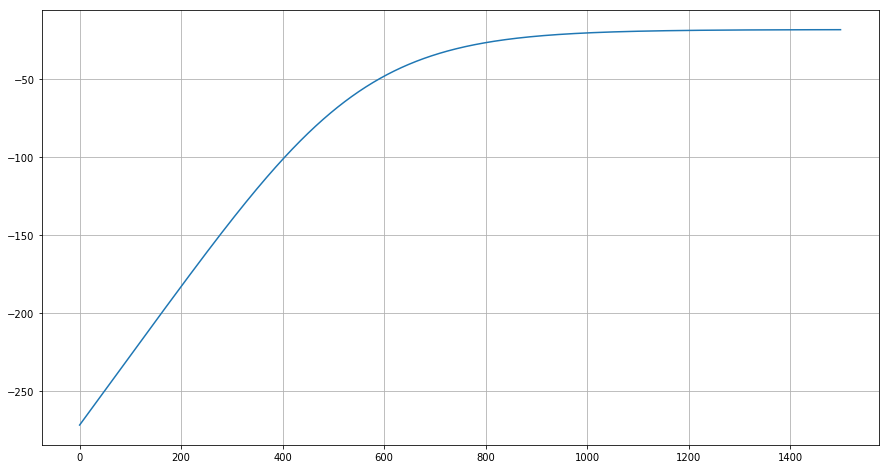

In [39]:
fig, ax = plt.subplots(figsize=(15, 8))

ax.grid()
sns.lineplot(range(len(temperatures)), [t - 272.15 for t in temperatures]);

The model will converge to the same stable state as the analytical solution, after about 1000 years:

In [44]:
# Final state in Kelvin and Celsius
temperatures[-1], temperatures[-1] - 272.15

(254.00220395376684, -18.14779604623314)

As the next step, atmosphere should be introduced into this model as well.